In [17]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np

%pylab inline
pylab.rcParams['figure.figsize'] = (15,9)

Populating the interactive namespace from numpy and matplotlib


In [27]:
def aggregate(df):
    return df.groupby(0)[df.columns[1:54]].min()

In [30]:
out_dir = '../papi_output/'
path = out_dir + 'o3m.csv'

df = pd.read_csv(path, header=None)
df = aggregate(df)
df = df.sample(frac=1) # shuffle for better cross-validation

In [32]:
x = df.iloc[:,0:52].as_matrix()
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
y = df.iloc[:,52].as_matrix()

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
pca = PCA(n_components=6)
pca.fit(x)
x2 = pca.transform(x)

In [34]:
svr = SVR(kernel='linear')
svr.fit(x2, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
scores = cross_val_score(svr, x2, y, cv=3)
scores.mean()

0.67864797538963828

In [36]:
pca.explained_variance_ratio_.sum()

0.99966433422546008

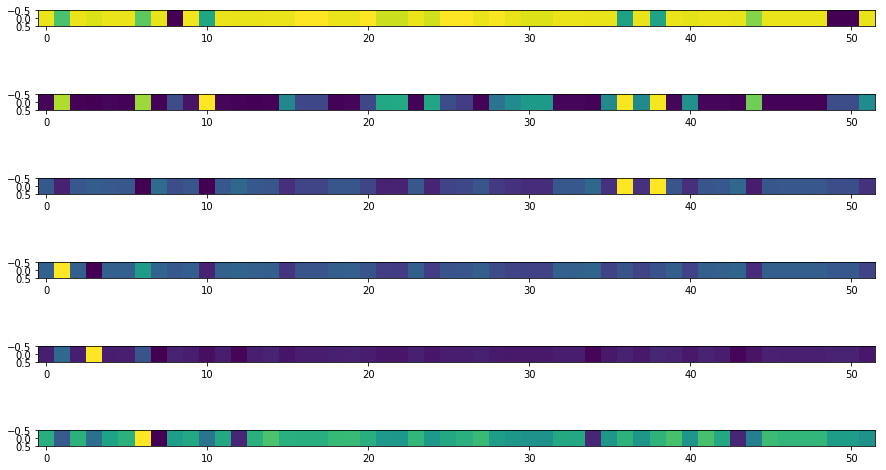

In [37]:
# just to visualize which of 52 PAPI output events are most significant (marked in yellow)

fig, axs = plt.subplots(nrows=6)
for i, ax in enumerate(axs): 
    ax.imshow(pca.components_[i:i+1])
plt.show()

In [31]:
df

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
0,,,,,,,,,,,,,,,,,,,,,
29,270,162,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.015
33,501,104,0,0,13069,0,15,0,0,30095,...,67,0,0,0,0,0,0,0,0,39.931
10,189,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.091
35,61125,3118,13,0,74865,13,2876,0,0,164835,...,0,108449008,0,0,0,0,0,0,651381379,202.648
16,216,12,17,0,0,33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.431
27,43,186,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.348
6,370,95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.661
22,117629548,6288,13596142,70,106424920,13596212,6872,531,0,25607187,...,99011,751244254,8122129,671849187,671849187,671849187,0,0,8323446845,2545.306
25,1168,258,65,0,785955,65,261,0,0,0,...,0,0,0,0,0,0,0,0,0,13.780
